## Camera Calibration

In [4]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/*.jpg')

# Step through the list and search for chessboard corners
for index, filename in enumerate(images):
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        # cv2.drawChessboardCorners(img, (9,6), corners, ret)

In [ ]:
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


## Test calibration result

(720, 1280, 3)
(1280, 720)


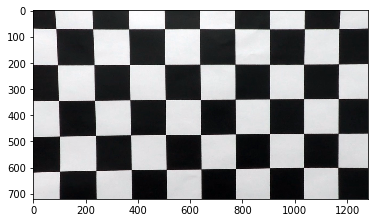

In [10]:
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])
print(img.shape)
print(img_size)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)

## Undistort Image

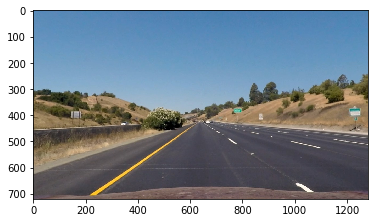

In [16]:
img = cv2.imread('test_images/straight_lines1.jpg')
img_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Calculate binary image

(720, 1280, 3)
(720, 1280)
(720, 1280)


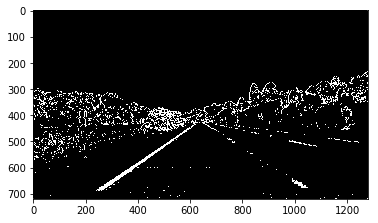

In [20]:
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
print(hls.shape)

s_channel = hls[:,:,2]
print(s_channel.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)

# Filter by saturation

s_threshold_min = 170
s_threshold_max = 255
s_binary = np.zeros_like(s_channel)

s_binary[(s_channel >= s_threshold_min) & (s_channel <= s_threshold_max)] = 1
# plt.imshow(s_binary, cmap='gray')

# Filter by gradient at X axis

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
abs_sobelx = np.absolute(sobelx)
scaled_sobelx = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))

sobel_threshold_min = 20
sobel_threshold_max = 100

sx_binary = np.zeros_like(gray)
sx_binary[(scaled_sobelx >= sobel_threshold_min) & (scaled_sobelx <= sobel_threshold_max)] = 1
# plt.imshow(sx_binary, cmap='gray')

# Combine both filter results
combined_binary = np.zeros_like(gray)
combined_binary[(s_binary == 1) | (sx_binary == 1)] = 1
plt.imshow(combined_binary, cmap='gray')


## Prospective transform

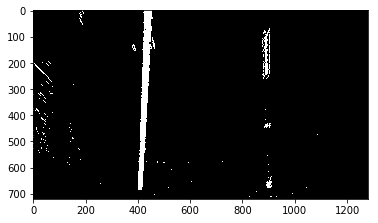

In [23]:
src = np.float32(
    [[250, 679],
     [529, 486],
     [746, 486],
     [1040, 679]])

dst = np.float32(
    [[400, 679],
     [400, 50],
     [900, 50],
     [900, 679]])

M = cv2.getPerspectiveTransform(src, dst)

warped = cv2.warpPerspective(combined_binary, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(warped, cmap='gray')

## Find lane

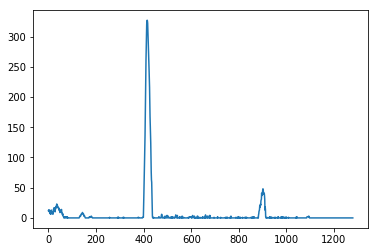

In [24]:
histogram = np.sum(warped[warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)